# Display calibration results using html 
Generates an html file to display results from a single calibration run in a clear and descriptive manner
Converts csv files to html tables and includes calibration settings as text 

In [1]:
import os 
import pandas as pd 
import numpy as np
import base64
from IPython.display import display_html, Image
from itertools import chain, cycle

In [2]:
# Define directories 
results_dir = "../data/results/"
calibr_date = "2022-Feb-17-11.33"
calibr_path = results_dir+calibr_date+"/" # Path to calibration results 
html_filename = calibr_path+"results.html" # Name to give output filename

# Check that paths exist 
if not os.path.isdir(results_dir): 
    raise ValueError("Path does not exist: "+results_dir)
if not os.path.isdir(calibr_path): 
    raise ValueError("Path does not exist: "+calibr_path)

In [3]:
def display_df_html(filepath, title=None, round_floats=True, decimals=2, save=False, html_filename="test.html"): 
    """Display a dataframe in html
    
    Args: 
        filepath (str): path to csv file 
        title (str, optional): title to give table (default to no title)
        round_floats (bool, optional): round floats in table? (default to True)
        decimals (int, optional): how many decimal places to use when rounding floats (default to 2)
        save (bool, optional): save as html file? (default to false)
        html_filename (str, optional): path to html file (default to test.html)
        
    Returns: 
        csv displayed as html in notebook 
    
    """
    
    df = pd.read_csv(filepath) # Read in csv file using pandas 
    if round_floats: 
        df = df.round(decimals=decimals)
    html_str=''
    html_str+='<th style="text-align:center"><td style="vertical-align:top">'
    if type(title)==str: # Add title 
        html_str+=f'<h3>{title}</h3>'
    html_str+=df.to_html(index=False).replace('table','table style="display:inline"')
    html_str+='</td></th>'
   
    with open(html_filename, 'a') as _file: # Write table to html file
        _file.write(f'<h3>{title}</h3>')
        _file.write(df.to_html(index=False))
        _file.write("<br><br>")
    
    display_html(html_str, raw=True) # Display table in notebook

In [4]:
def display_best_fit_params_mean(filepath, title=None, round_floats=True, decimals=2, save=False, html_filename="test.html"): 
    """ Same as display_df_html
    Special case for this csv because the round function doesn't work the mean column due to the column containing both floats and strings 
    
    Args: 
        filepath (str): path to csv file 
        title (str, optional): title to give table (default to no title)
        round_floats (bool, optional): round floats in table? (default to True)
        decimals (int, optional): how many decimal places to use when rounding floats (default to 2)
        save (bool, optional): save as html file? (default to false)
        html_filename (str, optional): path to html file (default to test.html)
        
    Returns: 
        csv displayed as html in notebook 
    """
    df = pd.read_csv(filepath) # Read in csv file using pandas
    if round_floats: # Perfom some messy rounding 
        df["mean"] = list(df["mean"][:5].values.astype(float).round(decimals=decimals)) + [df["mean"][5]] + [round(float(df["mean"][6]),decimals)]
        df["std"] = df["std"].round(decimals=decimals)
    html_str=''
    html_str+='<th style="text-align:center"><td style="vertical-align:top">'
    if type(title)==str: # Add title 
        html_str+=f'<h3>{title}</h3>'
    html_str+=df.to_html(index=False).replace('table','table style="display:inline"')
    html_str+='</td></th>'
    
    with open(html_filename, 'a') as _file: # Write table to html file
        _file.write(f'<h3>{title}</h3>')
        _file.write(df.to_html(index=False))
        _file.write("<br><br>")
    
    display_html(html_str, raw=True) # Display table in notebook

In [5]:
def display_html_info_file(filepath): 
    """ Display calibration settings textfile in html 
    
    Args: 
        filepath (str): path to textfile containing calibration settings 
     Returns: 
        text displayed as html in notebook
    
    """
    info_file = open(filepath) # Open file
    file_contents = info_file.read() # Read file contents 
    contents_split = file_contents.splitlines() # Split textfile by linebreak (\n)
    with open(html_filename, 'a') as f:
        for line in contents_split: # Read each line in file
            if line=="Calibration Settings": 
                display_html("<h3>"+line+"</h3>", raw=True) # Make text bold for title
                f.write("<h3>"+line+"</h3>")
            else: 
                display_html(line, raw=True)
                f.write(line+"<br>")
        f.write("<br>") # Add extra line break
        f.close()

In [6]:
def write_image_to_html(img_path, html_filename="test.html", img_width=1000): 
    """ Write png image to html file 
    
    Args: 
        img_path (str): path to image 
        html_filename (str, optional): path to html file (default to test.html)
        img_width (int, optional): pixel width of image in html (default to 1000)
    
    Returns: 
        image saved to html file
    """
    
    data_uri = base64.b64encode(open(img_path, 'rb').read()).decode('utf-8')
    img_tag = '<img src="data:image/png;base64,{0}" width="{1}">'.format(data_uri, img_width)
    with open(html_filename, 'a') as f: # Write table to html file
        f.write(img_tag)
    f.close()

Calibration Settings

Date: 2022-02-17 11:33

Number of iterations: 1000

Calibration method: Nicole method

Sites used in calibration: NEAT1, NEAT2, NEAT3, Moab, Holloman

Equations tested: mod_shao, owen, sorenson

Wind data source: tower data

Scale height computed as: scale height = x/h (where x = gap size, h = vegetation height

Vegetation type(s) used:herbac_hgt

P(gap sizes): only using gap size > 2+

Size of max gap bins: 3, 5, 7

Calibration runtime: 1:23:30

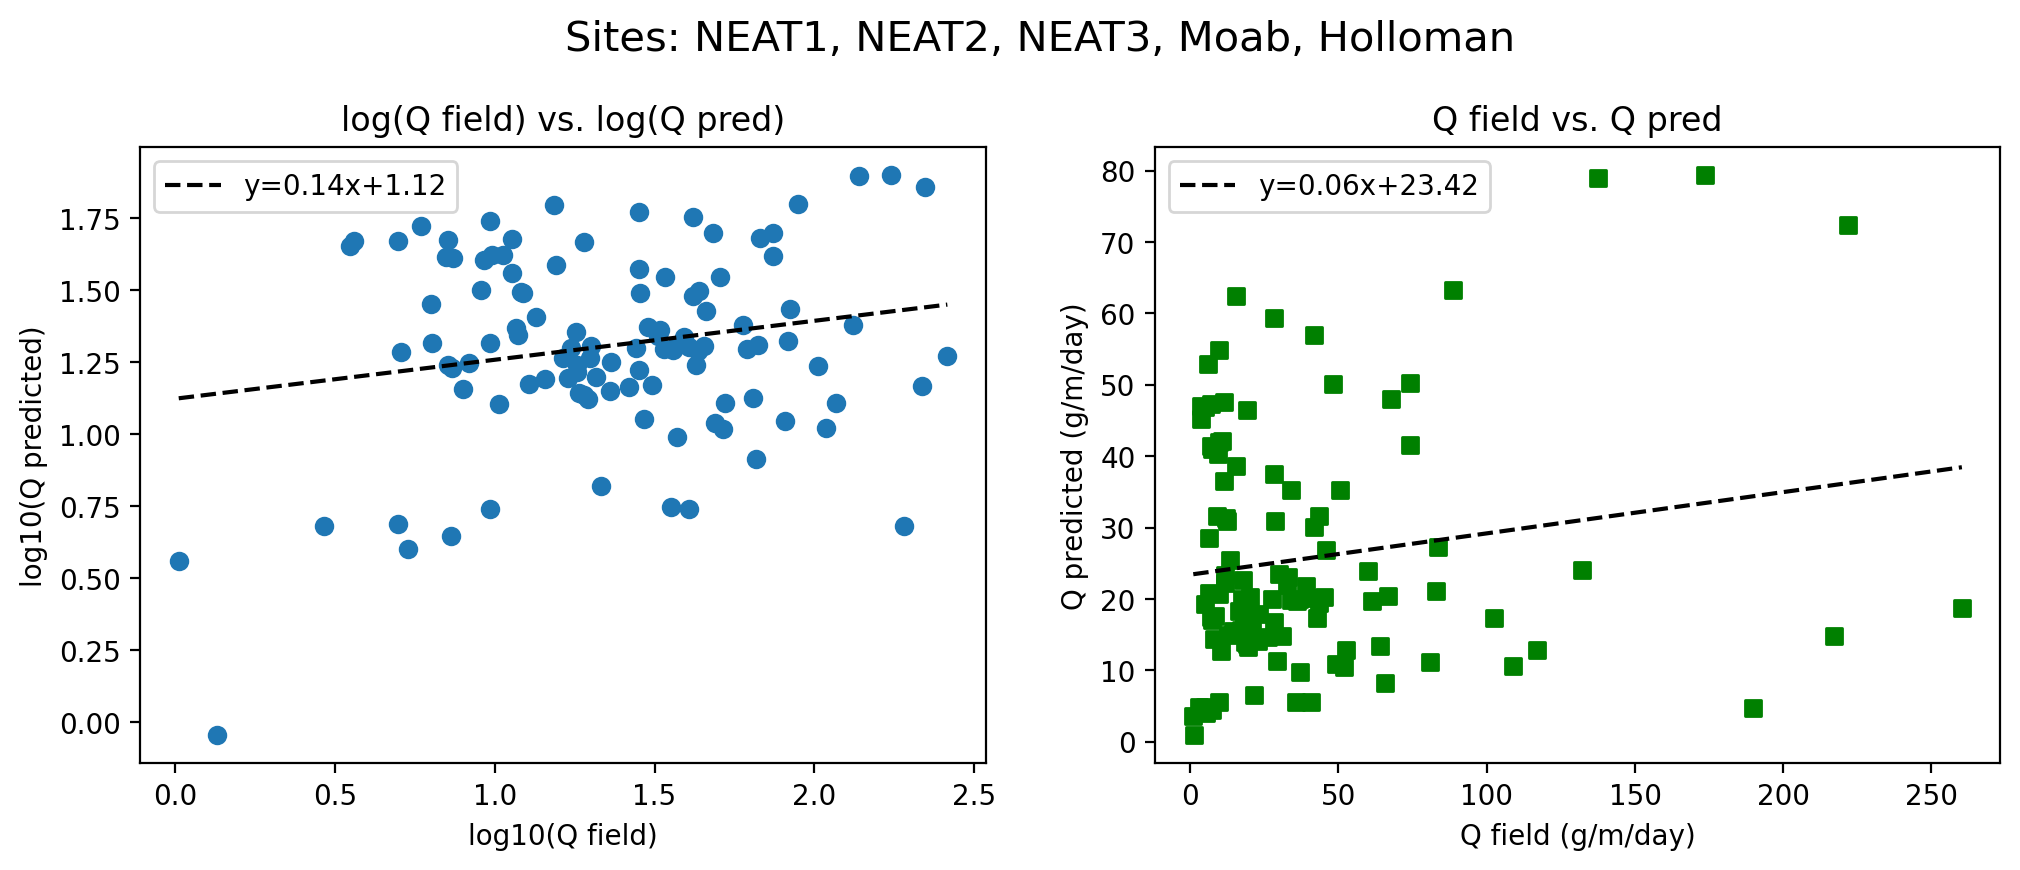

Site name,RMSEL,slope,intercept,Er,corr_coefficient,num_values
NEAT1,0.53,-0.27,1.72,2.35,-0.50,16.0
NEAT2,0.46,-0.12,1.63,1.86,-0.18,19.0
NEAT3,0.48,-0.19,1.61,2.05,-0.22,18.0
Moab,0.73,0.37,0.43,4.40,0.63,21.0
Holloman,0.39,0.56,0.45,1.45,0.74,35.0


parameter,mean,std
log(A),-3.77,0.11
C,7.5,1.52
U,0.38,0.01
log(z0),-0.36,0.04
max_gap,3.0,0.00
equation type (mode),mod_shao,NaN
max gap (mode),3.0,NaN


Sitename,POLARIS_perc_sand_updated
NEAT1,0.45
NEAT2,0.45
NEAT3,0.45
Moab,0.42
Holloman,0.47


In [7]:
# --------------- Write results to html file ---------------

# Create HTML file
title = "Calibration Results"
f = open(html_filename, "w")
f.write(("<h1>{0}</h1>").format(title))
f.close()

# Any extra descriptive text 
descriptive_text = "Calibration run using wind tower data, only gap sizes bins > 2+, and scale height = x/h"
f = open(html_filename, "a")
if descriptive_text is not None: 
    f.write(("{0}<br><br>").format(descriptive_text))
else: 
    f.write("<br><br>")
f.close()

# Calibration settings 
display_html_info_file(filepath=calibr_path+"calibration_info.txt")

# Plot of Q measured vs. Q estimated 
display(Image(filename=calibr_path+"figs/all_sites.png")) # Display in notebook 
write_image_to_html(img_path=calibr_path+"figs/all_sites.png", html_filename=html_filename, img_width=1000) # Add to HTML file

# csv results 
display_df_html(calibr_path+"rmsel_best_fit.csv", title="Results by site using best fit parameters", save=True, html_filename=html_filename)
display_best_fit_params_mean(calibr_path+"best_fit_params_mean.csv", title="Mean best fit parameters for all sites", save=True, html_filename=html_filename)
display_df_html(calibr_path+"u_threshold_by_site.csv", title="Threshold wind velocity (m/s)", save=True, html_filename=html_filename)